Submitted by: Aayush Man Shakya  
CE IV/I

## Training an XOR gate neural network

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Training Data (XOR gate inputs and outputs)

x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

In [83]:
# 2 input nodes, 5 hidden layer nodes, 1 output node

num_input = 2
num_hidden = 5
num_output = 1

In [84]:
# Initialize the weights and bias randomly

Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [85]:
# initialize the hidden to output layer weights

Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1,num_output))

In [86]:
# Define the sigmoid activation function

def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [87]:
# Define the derivative of the sigmoid function

def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [88]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    
    return z1,a1,z2,y_hat

In [89]:
 def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

In [90]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    
    return J

In [91]:
# Set the learning rate and the number of training iterations

alpha = 0.01
num_iterations = 5000

In [92]:
# train 5000 iterations

cost =[]
for i in range(num_iterations):
   z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)    
   dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
       
   #update weights
   Wxh = Wxh -alpha * dJ_dWxh
   Why = Why -alpha * dJ_dWhy
   
   #compute cost
   c = cost_function(y, y_hat)
   
   cost.append(c)

Text(0, 0.5, 'Cost')

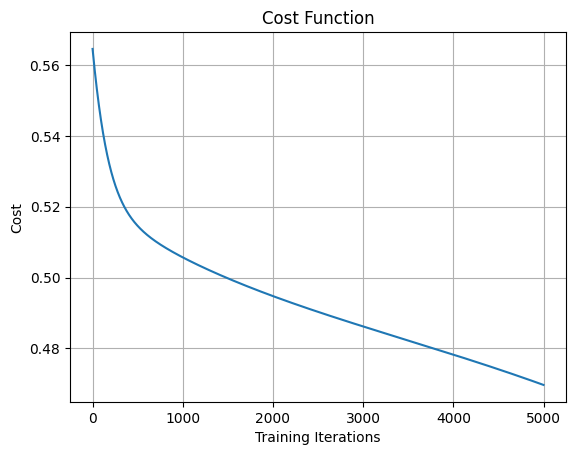

In [93]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

In [94]:
# Test the trained network
z1, a1, z2, y_hat = forward_prop(x, Wxh, Why)

print("Predictions (y_hat):")
print(y_hat)

print("Rounded predictions (0 or 1):")
print(np.round(y_hat))

print("Actual outputs (y):")
print(y)

Predictions (y_hat):
[[0.57305878]
 [0.45459169]
 [0.46028246]
 [0.49765638]]
Rounded predictions (0 or 1):
[[1.]
 [0.]
 [0.]
 [0.]]
Actual outputs (y):
[[1]
 [1]
 [0]
 [0]]


In [95]:
# with 20000 iterations

num_iterations = 20000

cost =[]
for i in range(num_iterations):
   z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)    
   dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
       
   #update weights
   Wxh = Wxh -alpha * dJ_dWxh
   Why = Why -alpha * dJ_dWhy
   
   #compute cost
   c = cost_function(y, y_hat)
   
   cost.append(c)

Text(0, 0.5, 'Cost')

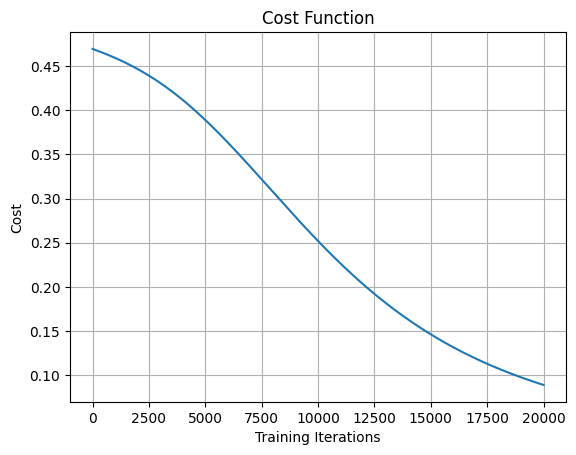

In [96]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

In [97]:
# Test the trained network
z1, a1, z2, y_hat = forward_prop(x, Wxh, Why)

print("Predictions (y_hat):")
print(y_hat)

print("Rounded predictions (0 or 1):")
print(np.round(y_hat))

print("Actual outputs (y):")
print(y)

Predictions (y_hat):
[[0.790155  ]
 [0.78638751]
 [0.21054534]
 [0.2088454 ]]
Rounded predictions (0 or 1):
[[1.]
 [1.]
 [0.]
 [0.]]
Actual outputs (y):
[[1]
 [1]
 [0]
 [0]]


# QUESTIONS

---

1. **How does deep learning differ from machine learning?**
   
    Handcrafting the right set of features to predict a certain outcome(Feature Engineering) plays a crucial role in machine learning, but finding and engineering the right set of features is not an easy task.
 
    With deep learning, we don't have to handcraft such features. Since deep ANNs employ several layers, it learns the complex intrinsic features and multi-level abstract representation of data by itself.

---

2. **What does the word deep mean in deep learning?**

   The word deep in deep learning refers to the presence of multiple hidden layers between the input and output layer.

---

3. **Why do we use the activation function?**

   We use activation functions to introduce non-linearity in the network. Without them, the neural network would behave like a simple linear model, no matter how many layers it has. Non-linearity helps the network learn complex patterns.

---

4. **Explain the dying ReLU problem.**

   The dying ReLU problem occurs when neurons in a network using the ReLU activation function stop activating and always output zero. This can happen when weights become such that the neuron’s output is always negative, and since ReLU outputs zero for negative inputs, the neuron effectively "dies" and stops learning.

---

5. **Define forward propagation.**

   The process of going from input layer to output layer is known as forward propagation. In order to predict the output value, inputs are propagated from the input layer to the output layer. During this propagation, they are multiplied by their respective weights on each layer and an activation function is applied on top of them.

---

6. **What is back propagation?**

   The process of going backwards in the network from the output layer to the input layer and updating the weights of the network using gradient descent to minimize the loss is called backpropagation. 

---

7. **Explain gradient checking.**

   Gradient checking is a technique used to verify if out backpropagation is implemented correctly. It compares the gradients calculated by our code(analytical gradients) with numerical gradients (calculated using an approximation formula).

---
